 # Mobile Price Classification with Machine learning
 
 Mobile phones are the best selling electronic devices as people keep updating their cell phones whenever they find new features in a new device. Thousands of mobiles are sold daily, in such a situation it is very difficult task for someone who is planning to set up their own mobile phone business to decide what the price of the mobile should be:
 
 I am going to train a classification model to classify the price range of mobile phones as:
 
 1. 0 (low cost)
 2. 1 (medium cost)
 3. 2 (high cost)
 4. 3 (very high cost)

### Import libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv('mobile_price.csv')

In [12]:
data.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
data.shape

(2000, 22)

In [14]:
# Check NaN 
data.isna().sum()

Unnamed: 0       0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Descriptive statistics

In [15]:
data.describe()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,577.494589,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,0.000000,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,499.750000,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,999.500000,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1499.250000,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1999.000000,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

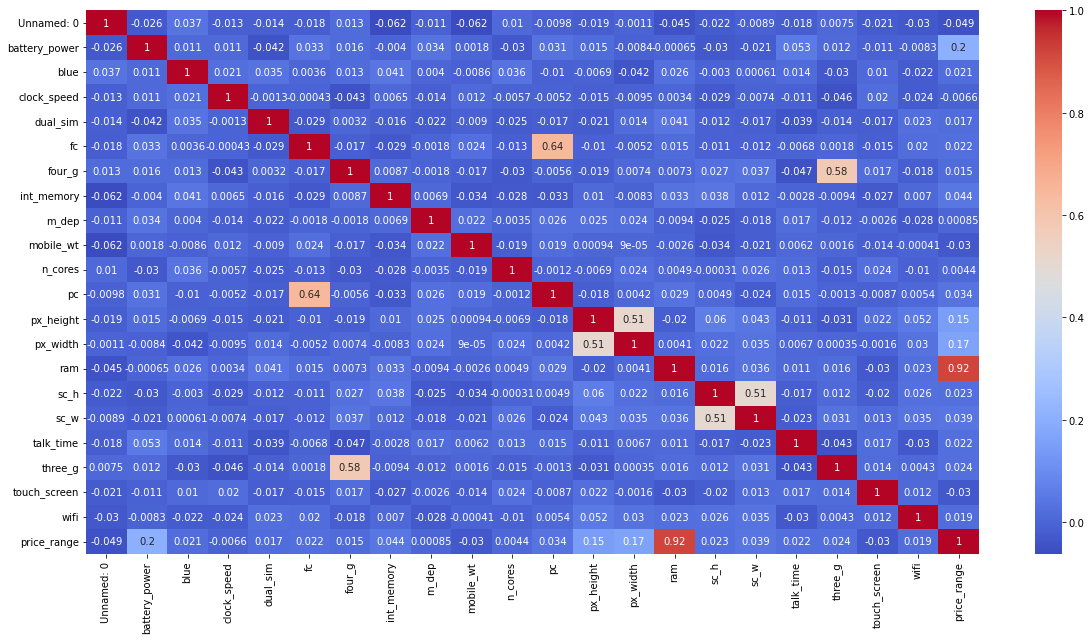

In [16]:
# Lets check correlation in the dataset
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [17]:
data.corr()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Unnamed: 0      -0.049376
Name: price_range, dtype: float64

## Data Preparation for ML

In [18]:
data['price_range'] = data['price_range'].map({0:'low cost', 1:'medium cost', 2:'high cost', 3:'very high cost'})

In [19]:
# X = features
# Y = target


X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [20]:
X.head(2)

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,842,0,2.2,0,1,0,7,0.6,188,...,2,20,756,2549,9,7,19,0,0,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,6,905,1988,2631,17,3,7,1,1,0


In [21]:
Y.head()

0    medium cost
1      high cost
2      high cost
3      high cost
4    medium cost
Name: price_range, dtype: object

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

## Train the model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [25]:
# Lets standardize the data
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [26]:
model = LogisticRegression()

model.fit(x_train_scaled,y_train)


LogisticRegression()

## Predictions and Evaluations


In [27]:
y_pred = model.predict(x_test_scaled)

In [28]:
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

     high cost       0.99      0.92      0.95       120
      low cost       0.98      0.95      0.97       132
   medium cost       0.90      0.98      0.94       118
very high cost       0.97      0.99      0.98       130

      accuracy                           0.96       500
     macro avg       0.96      0.96      0.96       500
  weighted avg       0.96      0.96      0.96       500



In [29]:
score = accuracy_score(y_test,y_pred)

In [30]:
print(f"The accuracy of the model is {score*100} %")

The accuracy of the model is 96.0 %


In [31]:
pd.crosstab(y_test,y_pred)

col_0,high cost,low cost,medium cost,very high cost
price_range,,,,
high cost,110,0,6,4
low cost,0,125,7,0
medium cost,0,2,116,0
very high cost,1,0,0,129


## The Accuracy of the model is 96%

### Another algorithm will be used to test for better accuracy

In [33]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [34]:
model_params = {'SVC':{'model':SVC(gamma='auto'),
                       'params':{'C':[1,3,5,10,15,20],
                                'kernel':['rbf','linear']}
                },

                
                'RandomForest':{'model':RandomForestClassifier(),
                                'params':{'n_estimators':[1,2,3,4,5,10,15,20,25,30]}},
                
                
                'LogReg':{'model':LogisticRegression(),
                          'params':{
                              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                              'C':[1,5,10]
                          }},
                
               'DTree':{'model':DecisionTreeClassifier(),
                        'params':{
                            'criterion':['gini','entropy'],
                            'max_depth':np.arange(20,dtype=int)
                        }}}

In [35]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train_scaled,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,SVC,0.958667,"{'C': 5, 'kernel': 'linear'}"
1,RandomForest,0.839333,{'n_estimators': 25}
2,LogReg,0.965333,"{'C': 5, 'solver': 'newton-cg'}"
3,DTree,0.854667,"{'criterion': 'entropy', 'max_depth': 8}"


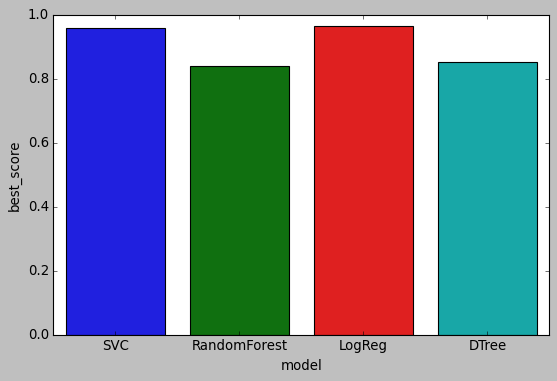

In [49]:
plt.figure(figsize=(8,5))
plt.style.use("classic")
sns.barplot(x=df.model,y=df.best_score, data=df)

plt.show()